# **Machine Learning para Business Intelligence** 
#### Profesor: Lucas Gómez Tobón

## 8. Análisis No Supervisado

### Análisis de Componentes Principales (PCA)

Haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:
   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargamos y visualizamos la primeras observaciones de los datos
lugares = pd.read_csv('../Data/lugares.csv')
lugares = lugares.set_index("Ciudad")
lugares.head()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


In [8]:
lugares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, Abilene,TX to Yuba-City,CA
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Clima y Terreno                          329 non-null    int64
 1   Alojamiento                              329 non-null    int64
 2   Cuidado de la salud y el medio ambiente  329 non-null    int64
 3   Crimen                                   329 non-null    int64
 4   Transporte                               329 non-null    int64
 5   Educación                                329 non-null    int64
 6   Artes                                    329 non-null    int64
 7   Recreación                               329 non-null    int64
 8   Economía                                 329 non-null    int64
dtypes: int64(9)
memory usage: 25.7+ KB


In [9]:
lugares.describe()

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,538.732523,8346.559271,1185.738602,961.054711,4210.082067,2814.887538,3150.884498,1845.957447,5525.364742
std,120.808259,2385.262622,1003.002036,357.154186,1451.179240,320.792953,4642.283738,807.888171,1084.468523
min,105.000000,5159.000000,43.000000,308.000000,1145.000000,1701.000000,52.000000,300.000000,3045.000000
25%,480.000000,6760.000000,583.000000,707.000000,3141.000000,2619.000000,778.000000,1316.000000,4842.000000
50%,542.000000,7877.000000,833.000000,947.000000,4080.000000,2794.000000,1871.000000,1670.000000,5384.000000
75%,592.000000,9015.000000,1445.000000,1156.000000,5205.000000,3012.000000,3844.000000,2176.000000,6113.000000
max,910.000000,23640.000000,7850.000000,2498.000000,8625.000000,3781.000000,56745.000000,4800.000000,9980.000000


<AxesSubplot: >

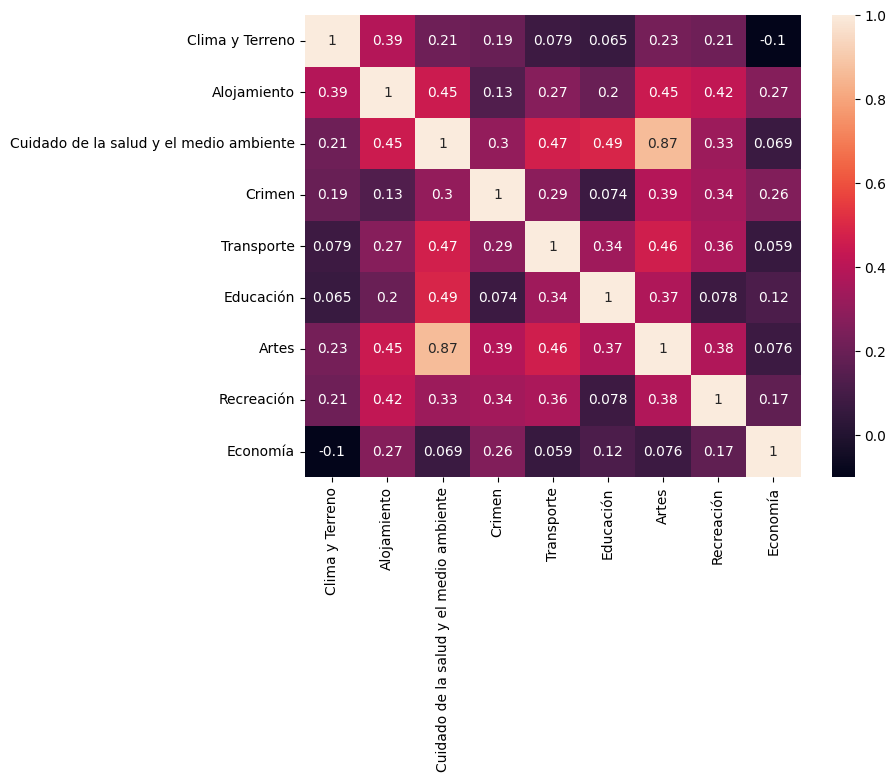

In [10]:
# Genera matriz de correlación
corr = lugares.corr()
# Define tamaño de la figura
plt.figure(figsize = (8,6))
# Mapa de calor para ver las correlaciones
sns.heatmap(corr, annot = True)

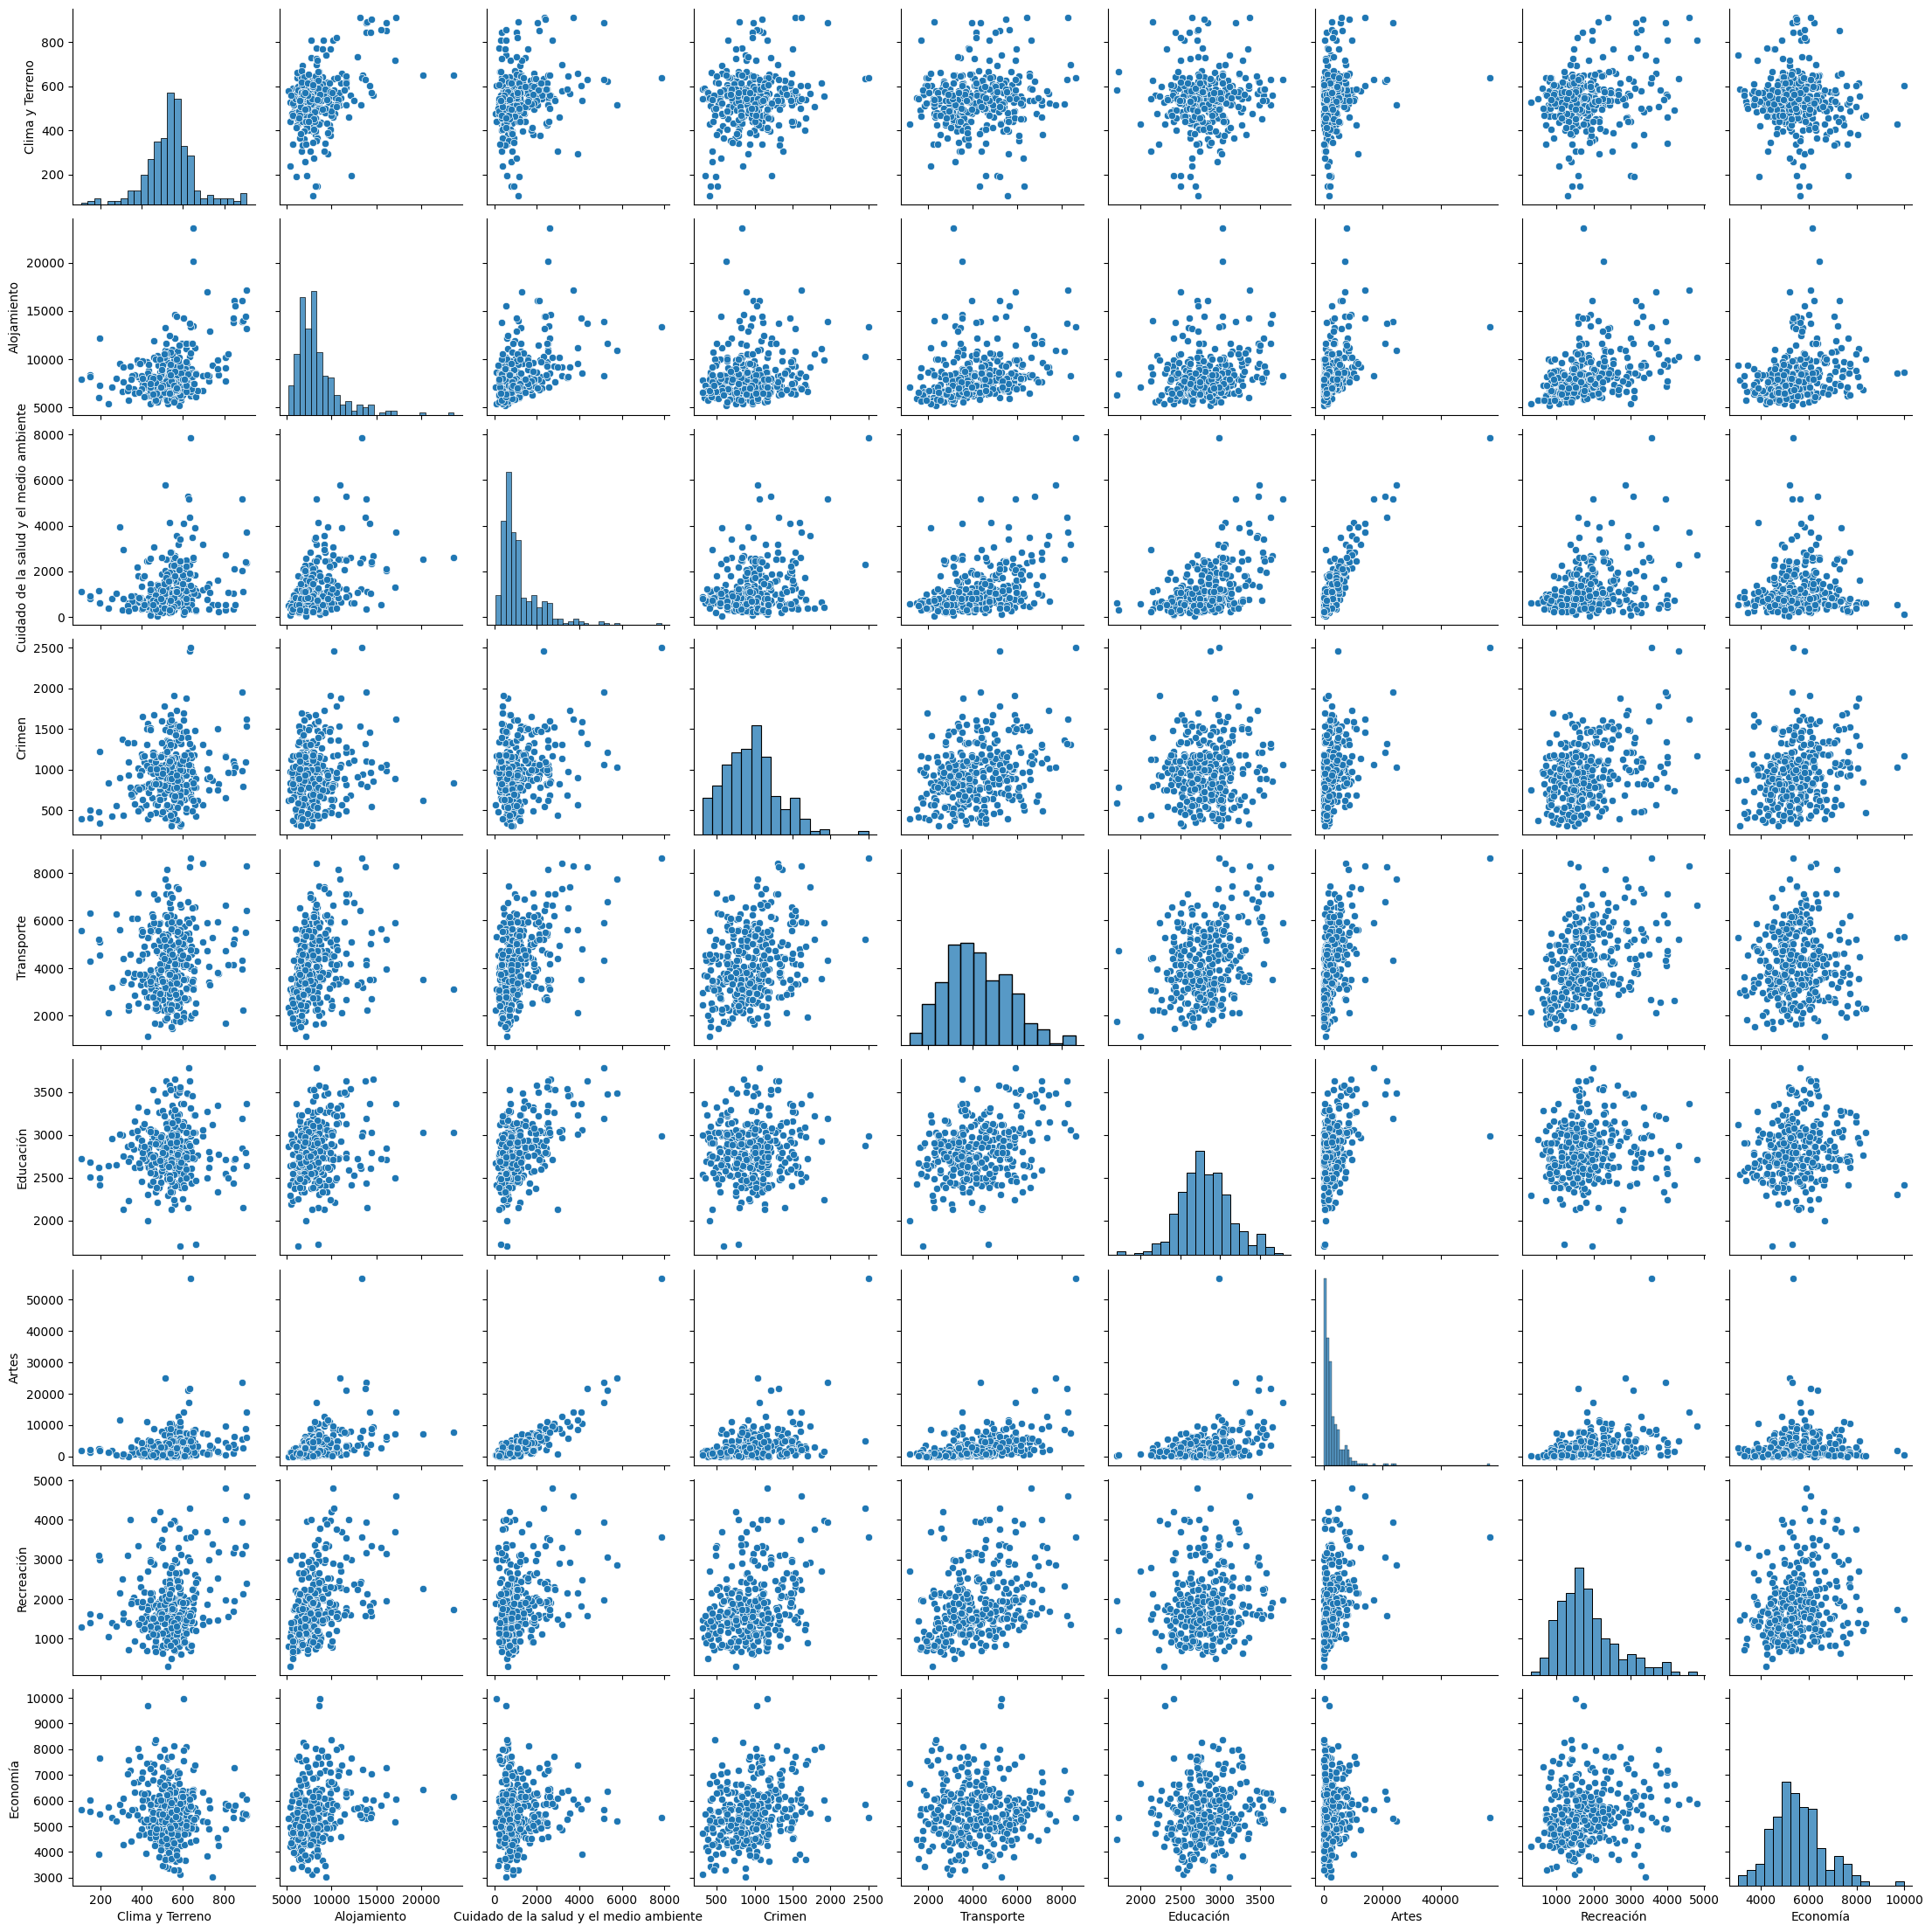

In [11]:
sns.pairplot(lugares)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lugares2 = scaler.fit_transform(lugares)
lugares2 = pd.DataFrame(lugares2, columns = lugares.columns)
lugares2.describe().round(2)

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
count,329.00,329.00,329.00,329.00,329.00,329.00,329.00,329.00,329.00
mean,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.60,-1.34,-1.14,-1.83,-2.12,-3.48,-0.67,-1.92,-2.29
25%,-0.49,-0.67,-0.60,-0.71,-0.74,-0.61,-0.51,-0.66,-0.63
50%,0.03,-0.20,-0.35,-0.04,-0.09,-0.07,-0.28,-0.22,-0.13
75%,0.44,0.28,0.26,0.55,0.69,0.62,0.15,0.41,0.54
max,3.08,6.42,6.65,4.31,3.05,3.02,11.56,3.66,4.11


In [13]:
lugares2.shape

(329, 9)

In [14]:
from sklearn.decomposition import PCA

modelo = PCA()
modelo.fit(lugares2)
resultados = pd.DataFrame({"Componente": range(1, 10), 
                           "Varianza explicada": modelo.explained_variance_})
resultados["Porcentaje de varianza explicada"]  = resultados["Varianza explicada"]/resultados["Varianza explicada"].sum()
resultados["Varianza acumulada"]  = resultados["Varianza explicada"].cumsum()
resultados["Porcentaje acumulado de varianza explicada"]  = resultados["Varianza acumulada"]/resultados["Varianza explicada"].sum()
resultados

,Componente,Varianza explicada,Porcentaje de varianza explicada,Varianza acumulada,Porcentaje acumulado de varianza explicada
0,1,3.418683,0.378699,3.418683,0.378699
1,2,1.217677,0.134886,4.636360,0.513585
2,3,1.144959,0.126831,5.781320,0.640416
3,4,0.923725,0.102324,6.705045,0.742741
4,5,0.755581,0.083698,7.460626,0.826439
5,6,0.632484,0.070062,8.093111,0.896501
6,7,0.494551,0.054783,8.587662,0.951284
7,8,0.319008,0.035338,8.906670,0.986622
8,9,0.120769,0.013378,9.027439,1.000000


<AxesSubplot:xlabel='Componente', ylabel='Porcentaje acumulado de varianza explicada'>

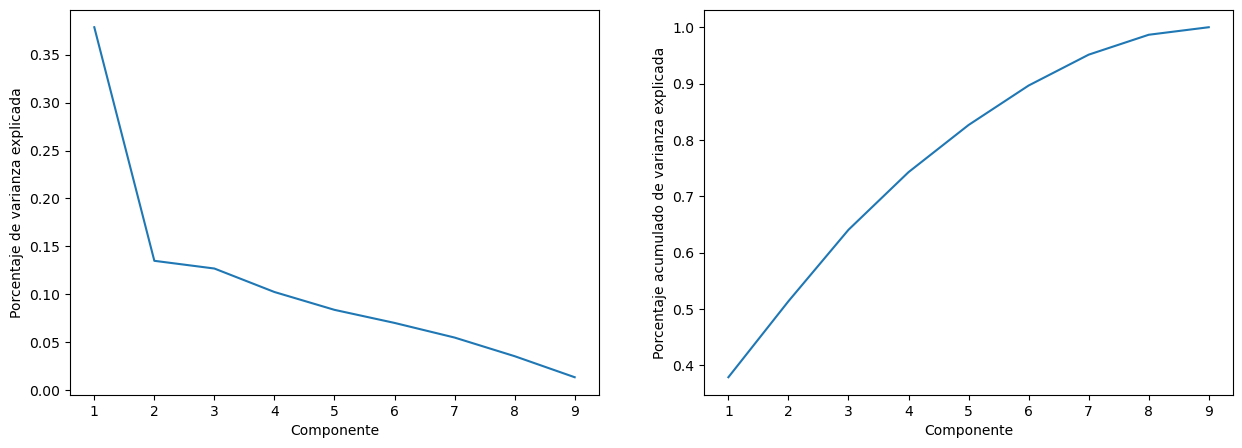

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.lineplot(data = resultados, x = "Componente", y = "Porcentaje de varianza explicada", ax = ax[0])
sns.lineplot(data = resultados, x = "Componente", y = "Porcentaje acumulado de varianza explicada", ax = ax[1])

In [10]:
cp = pd.DataFrame(modelo.components_, columns = lugares2.columns, index = ["C"+  str(i) for i in range(1, 10)])
cp

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
C1,0.206414,0.356522,0.460215,0.281298,0.351151,0.275293,0.463054,0.327888,0.135412
C2,0.217835,0.250624,-0.299465,0.355342,-0.179604,-0.483382,-0.194790,0.384475,0.471283
C3,0.689956,0.208172,0.007325,-0.185105,-0.146376,-0.229703,0.026484,0.050853,-0.607314
C4,0.137321,0.511829,0.014702,-0.539050,-0.302904,0.335411,-0.101080,-0.189801,0.421770
C5,-0.369150,0.233488,-0.103241,-0.523940,0.404348,-0.208819,-0.105098,0.529541,-0.159620
C6,-0.374605,0.141640,0.373848,-0.080923,-0.467592,-0.502170,0.461881,-0.089916,-0.032608
C7,-0.084706,-0.230639,0.013868,0.018606,-0.583391,0.426182,-0.021525,0.627878,-0.149741
C8,-0.362308,0.613855,-0.185676,0.430025,-0.093599,0.188668,-0.203990,-0.150596,-0.404809
C9,0.001391,0.013600,-0.716355,-0.058608,0.003629,0.110840,0.685758,-0.025506,0.000438


In [12]:
# Correlaciones entre los Componentes y las Variables
loadings = cp.T * np.sqrt(modelo.explained_variance_)
loadings[["C1", "C2"]]

,C1,C2
Clima y Terreno,0.381653,0.240378
Alojamiento,0.659197,0.276560
Cuidado de la salud y el medio ambiente,0.850922,-0.330455
Crimen,0.520112,0.392115
Transporte,0.649267,-0.198191
Educación,0.509007,-0.533404
Artes,0.856173,-0.214948
Recreación,0.606254,0.424262
Economía,0.250373,0.520054


In [13]:
ciudades = lugares.index

In [14]:
lugares_cp = pd.DataFrame(modelo.transform(lugares2))
lugares_cp["ciudades"] = ciudades
lugares_cp = lugares_cp[["ciudades", 0, 1]]

Text(0, 0.5, 'Componente Principal 2')

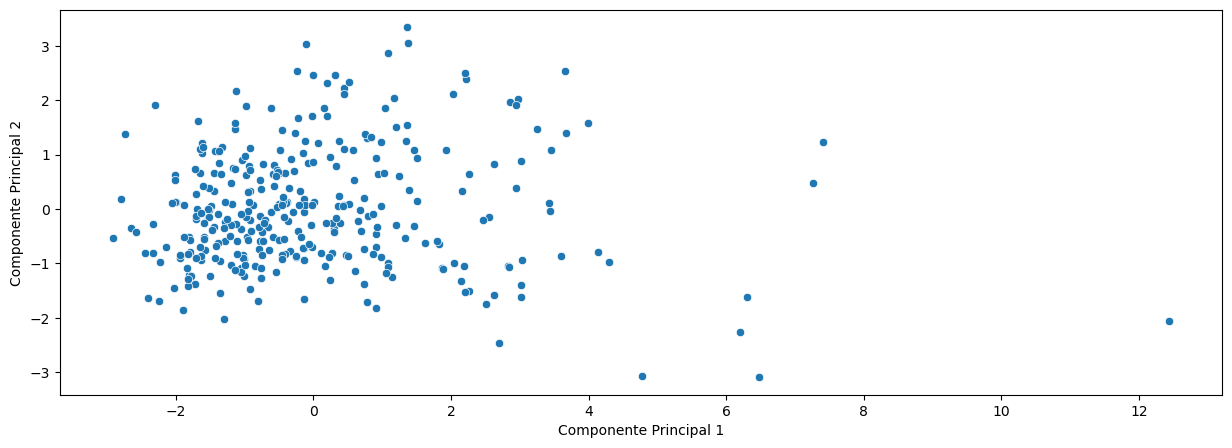

In [15]:
fig, ax = plt.subplots(figsize = (15,5))
sns.scatterplot(data = lugares_cp, x = 0, y = 1)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

In [16]:
outliers = lugares_cp.loc[lugares_cp[0] > 6, "ciudades"].values

In [17]:
lugares.loc[outliers,]

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Boston,MA",623,11609,5301,1215,6801,3479,21042,3066,6363
"Chicago,IL",514,10913,5766,1034,7742,3486,24846,2856,5205
"Los-Angeles,Long-Beach,CA",885,13868,5153,1960,4345,3195,23567,3948,5316
"New-York,NY",638,13358,7850,2498,8625,2984,56745,3579,5338
"San-Francisco,CA",910,17158,3726,1619,8299,3371,14226,4600,6063
"Washington,DC-MD-VA",631,13724,4361,1317,8236,3635,21701,1578,6072


C:\Users\Lucas\AppData\Local\Temp\ipykernel_16968\1271518289.py:5: DeprecationWarning: This function is deprecated. Please call randint(10, 75 + 1) instead
  plt.text(x = valor + 50, y = np.random.random_integers(10, 75),


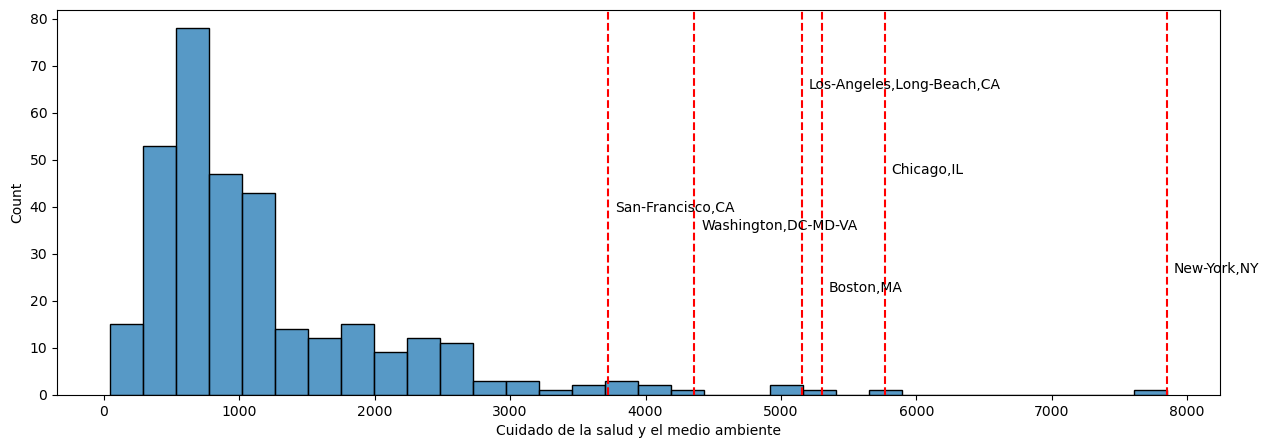

In [18]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(data = lugares, x = "Cuidado de la salud y el medio ambiente", ax = ax)
for ciudad, valor in lugares.loc[outliers, "Cuidado de la salud y el medio ambiente"].items():
    plt.axvline(x = valor, color = 'red', linestyle = "--")
    plt.text(x = valor + 50, y = np.random.random_integers(10, 75), 
             s = ciudad)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_16968\925596311.py:5: DeprecationWarning: This function is deprecated. Please call randint(10, 90 + 1) instead
  plt.text(x = valor + 50, y = np.random.random_integers(10, 90),


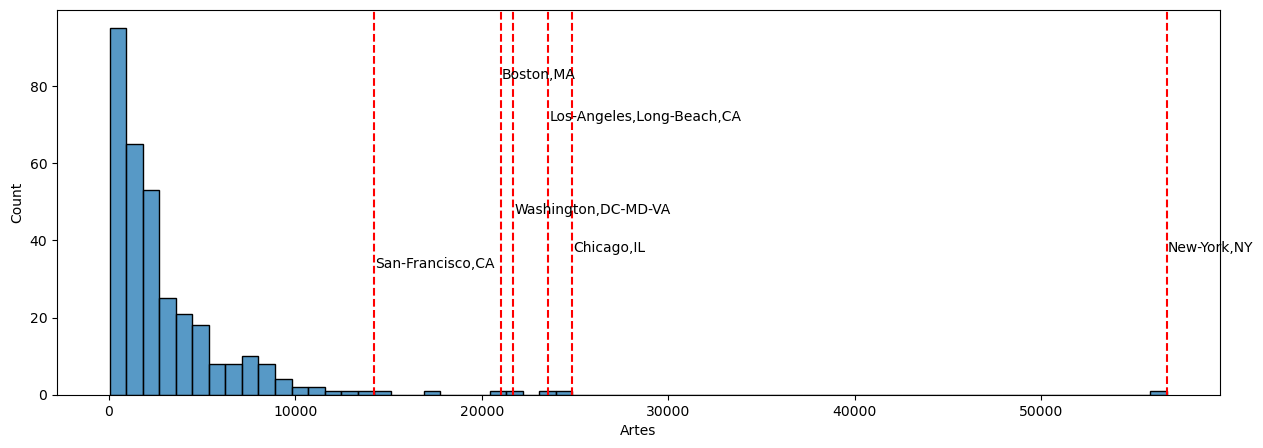

In [19]:
fig, ax = plt.subplots(figsize = (15,5))
sns.histplot(data = lugares, x = "Artes", ax = ax)
for ciudad, valor in lugares.loc[outliers, "Artes"].items():
    plt.axvline(x = valor, color = 'red', linestyle = "--")
    plt.text(x = valor + 50, y = np.random.random_integers(10, 90), 
             s = ciudad)

In [20]:
lugares["outliers"] = False
lugares.loc[outliers, "outliers"] = True

<AxesSubplot:xlabel='Cuidado de la salud y el medio ambiente', ylabel='Artes'>

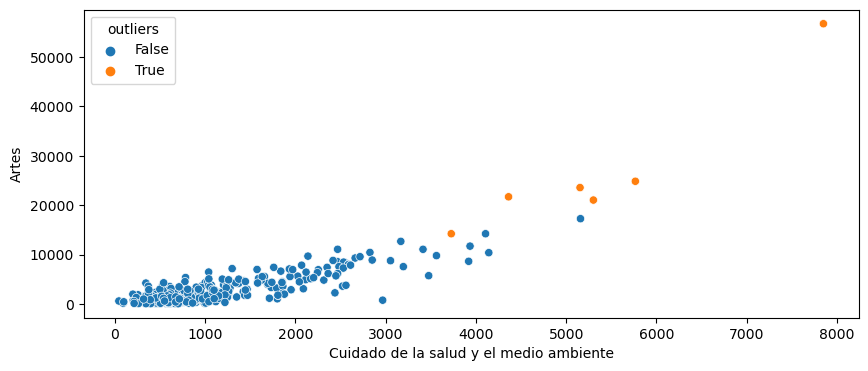

In [21]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.scatterplot(data = lugares, x = "Cuidado de la salud y el medio ambiente", y = "Artes", hue = "outliers", ax = ax)

### Clustering de rostros usando K-Medias

Vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos. 

In [24]:
from sklearn.datasets import fetch_olivetti_faces
df = fetch_olivetti_faces(data_home = "../Data")

In [25]:
X = df.data
y = df.target.astype(int)

In [28]:
# Cada fila corresponde a una persona.
# Cada columna representa un pixel. Las imagenes originalmente eran de tamaño 64x64
X.shape

(400, 4096)

<center>
<img src="img/image_processing.png" style = "width: 600px;"/>
</center>

<center>
<img src="img/image_processing2.png" style = "width: 600px;"/>
</center>

<center>
<img src="img/image_processing3.png" style = "width: 600px;"/>
</center>

<center>
<img src="img/matrix_to_vector.png" style = "width: 600px;"/>
</center>

In [45]:
df.images[0].shape

(64, 64)

(-0.5, 63.5, 63.5, -0.5)

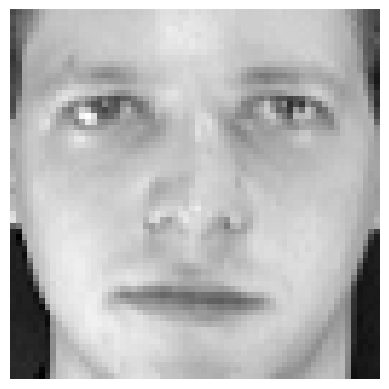

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.imshow(df.images[0], cmap = plt.cm.gray)
ax.axis("off")

In [71]:
df.images[0][0:2, 0:5]

array([[0.30991736, 0.3677686 , 0.41735536, 0.44214877, 0.5289256 ],
       [0.3429752 , 0.40495867, 0.43801653, 0.47107437, 0.553719  ]],
      dtype=float32)

In [68]:
X[0, 0:5]

array([0.30991736, 0.3677686 , 0.41735536, 0.44214877, 0.5289256 ],
      dtype=float32)

In [72]:
X[0, 64:70]

array([0.3429752 , 0.40495867, 0.43801653, 0.47107437, 0.553719  ,
       0.62396693], dtype=float32)

In [37]:
# ¿Cuántos rostros tenemos por persona?
unique, counts = np.unique(y, return_counts = True)
np.asarray((unique, counts)).T

array([[ 0, 10],
       [ 1, 10],
       [ 2, 10],
       [ 3, 10],
       [ 4, 10],
       [ 5, 10],
       [ 6, 10],
       [ 7, 10],
       [ 8, 10],
       [ 9, 10],
       [10, 10],
       [11, 10],
       [12, 10],
       [13, 10],
       [14, 10],
       [15, 10],
       [16, 10],
       [17, 10],
       [18, 10],
       [19, 10],
       [20, 10],
       [21, 10],
       [22, 10],
       [23, 10],
       [24, 10],
       [25, 10],
       [26, 10],
       [27, 10],
       [28, 10],
       [29, 10],
       [30, 10],
       [31, 10],
       [32, 10],
       [33, 10],
       [34, 10],
       [35, 10],
       [36, 10],
       [37, 10],
       [38, 10],
       [39, 10]], dtype=int64)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_16968\1980321679.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows = 1, ncols = 10, figsize = (20, 2))


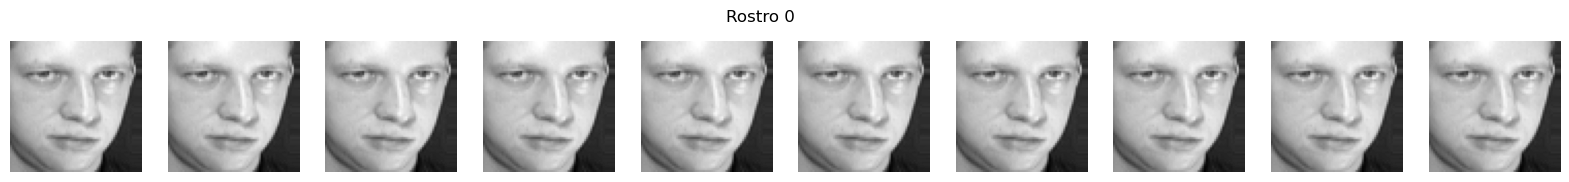

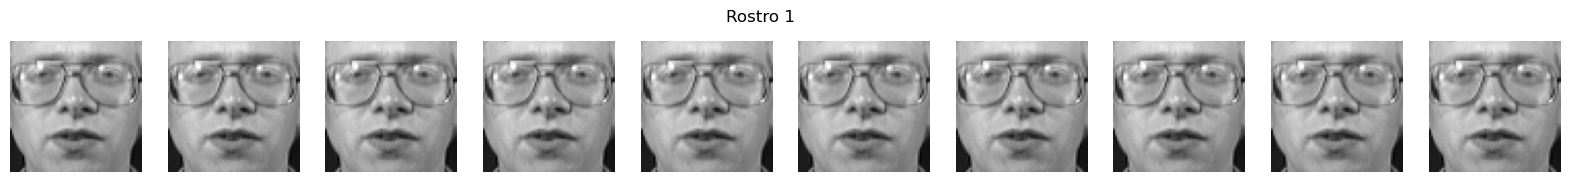

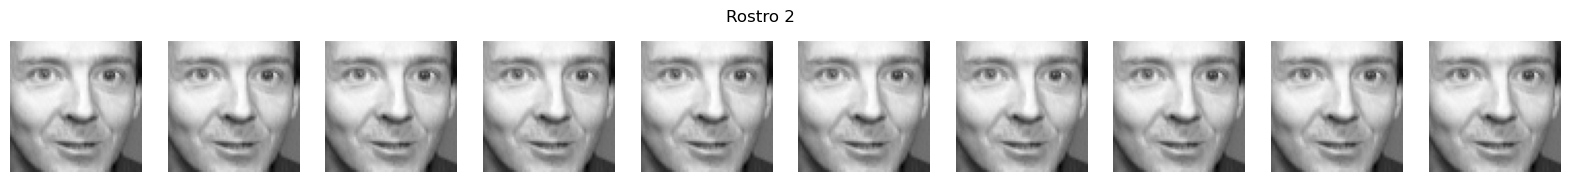

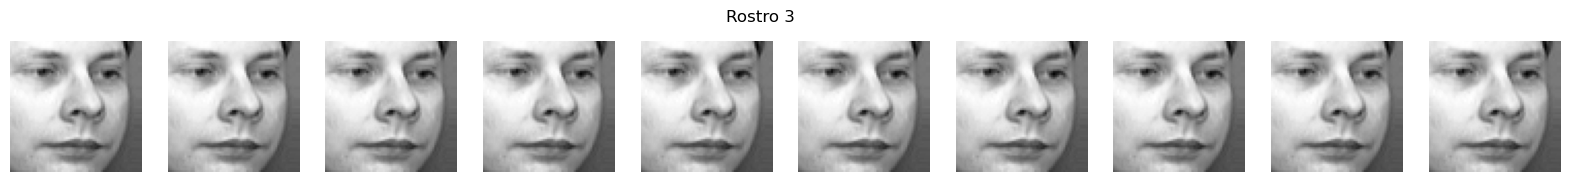

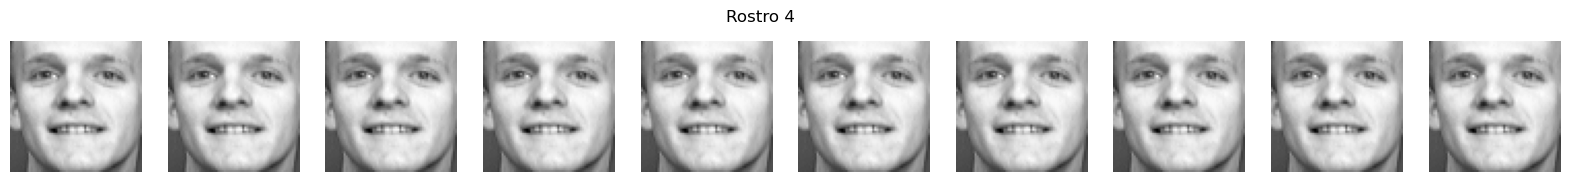

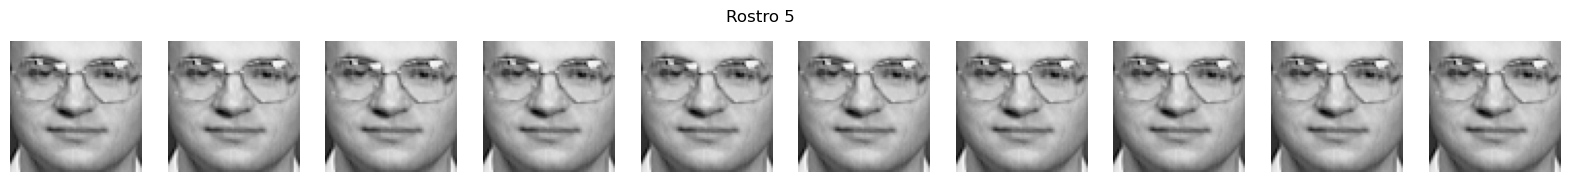

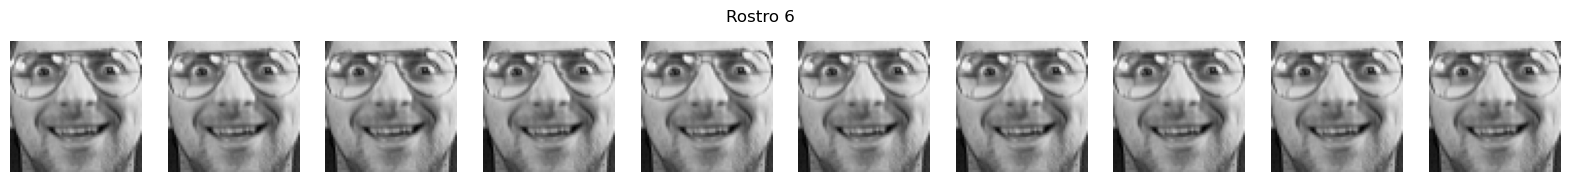

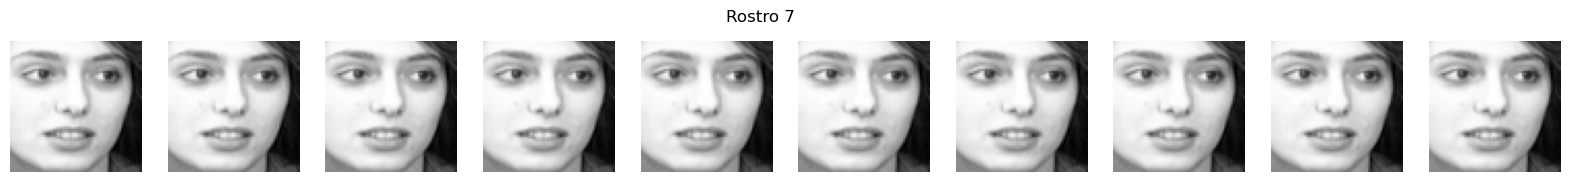

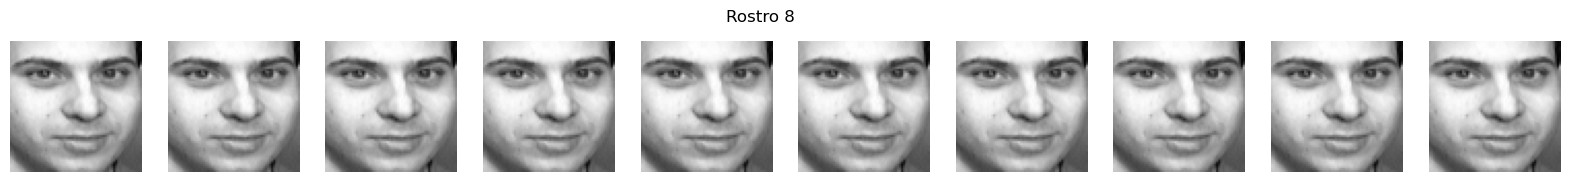

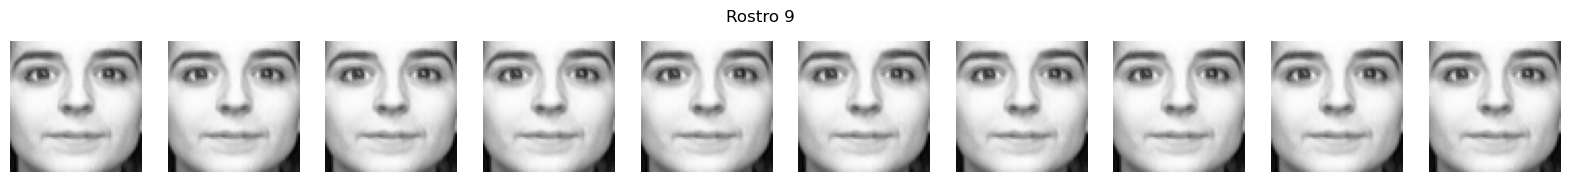

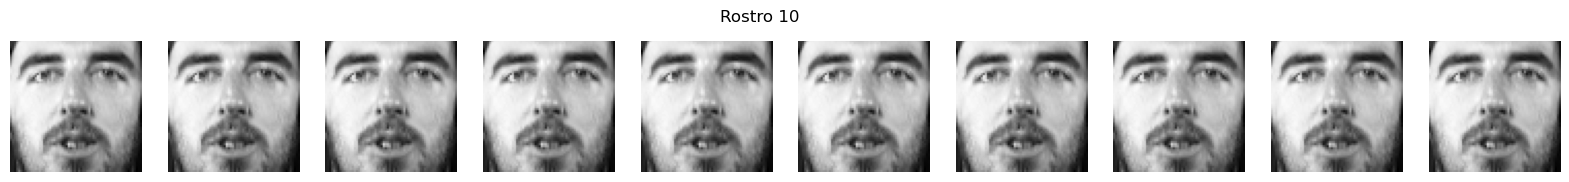

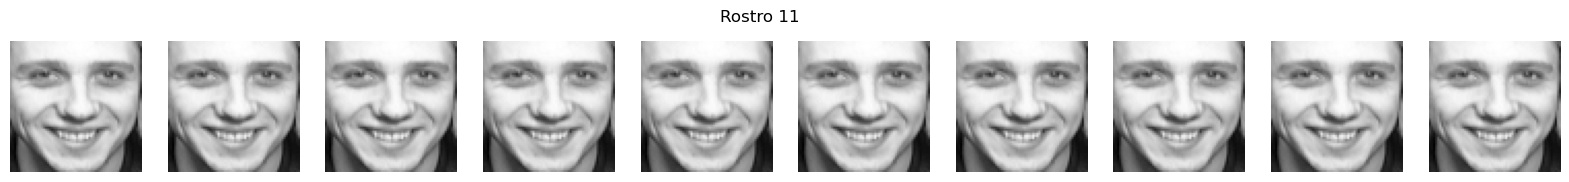

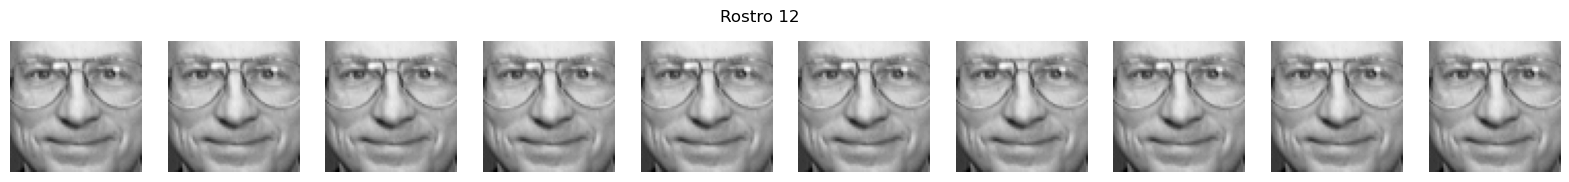

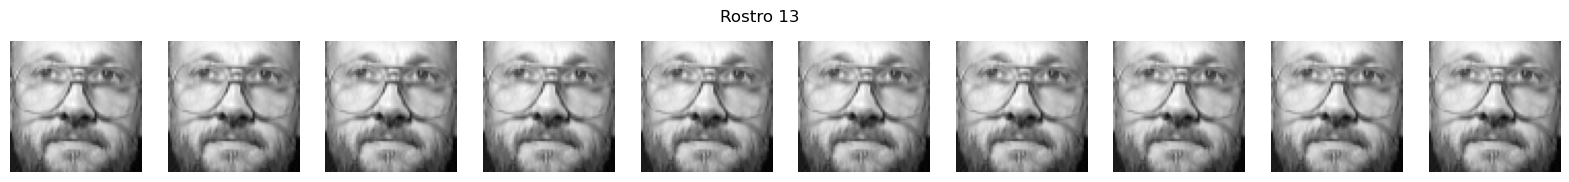

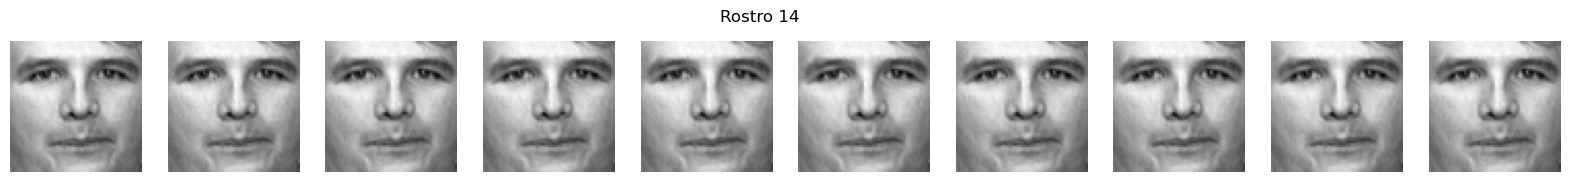

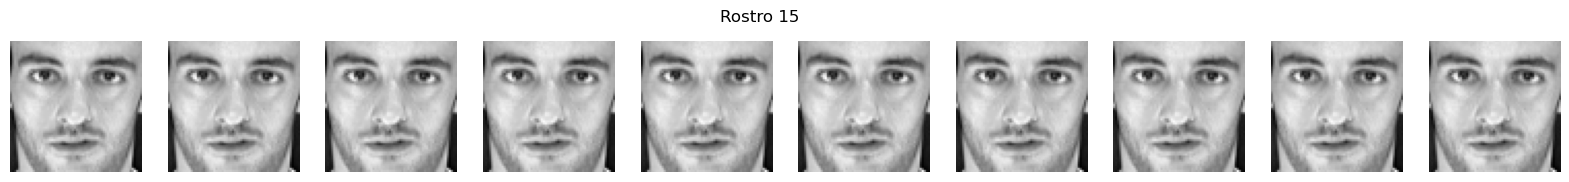

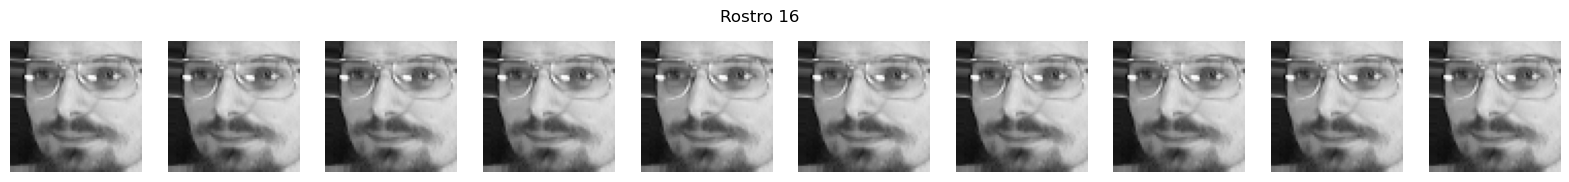

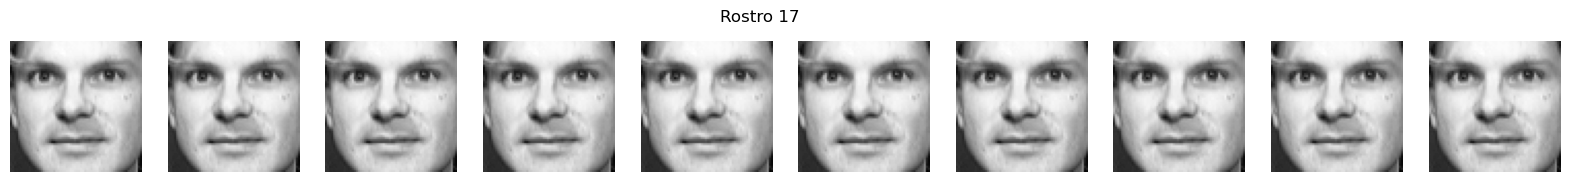

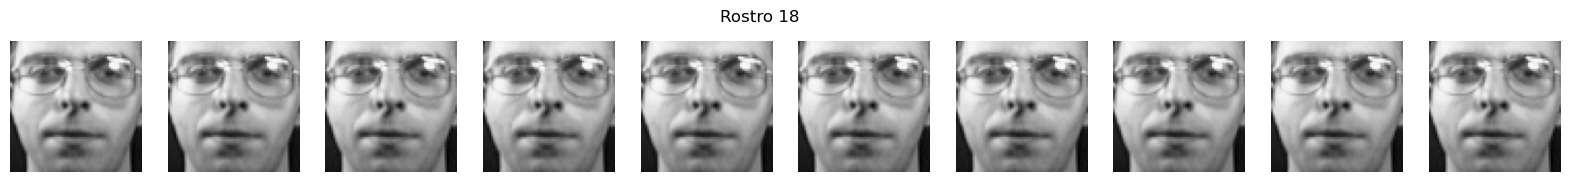

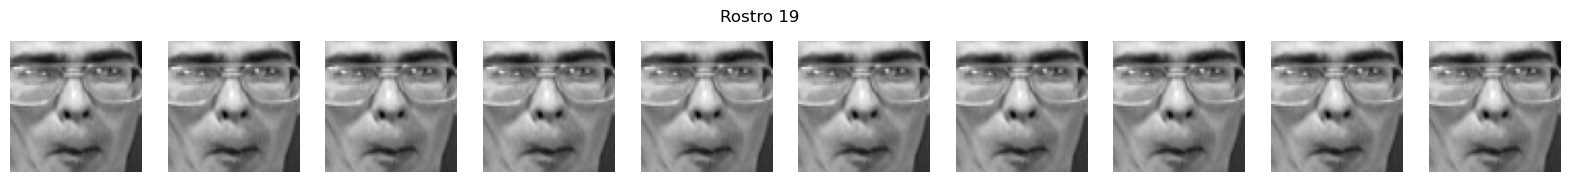

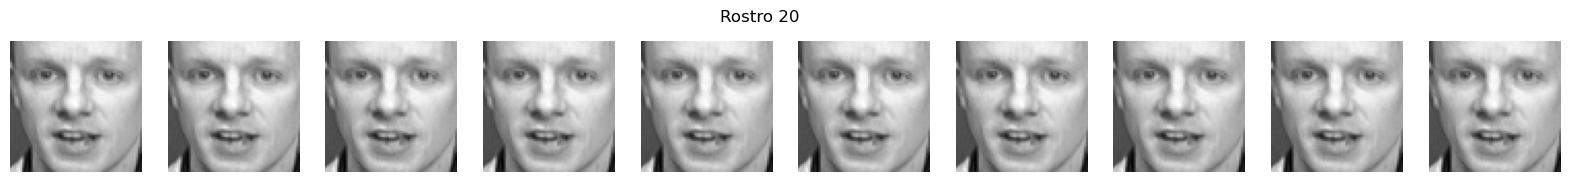

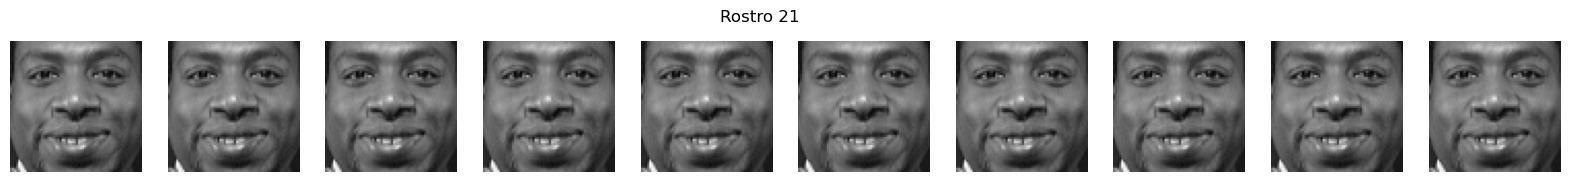

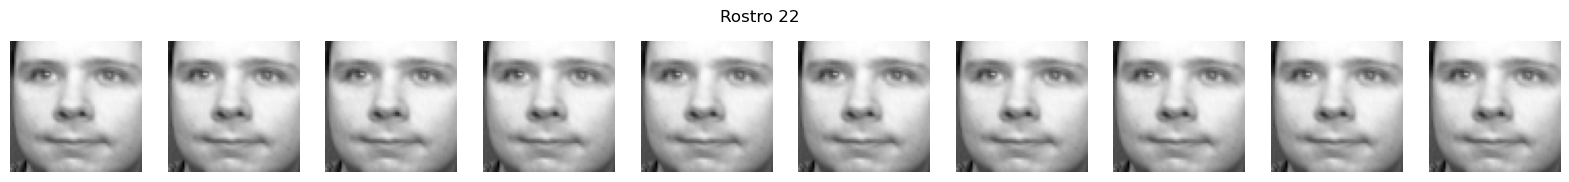

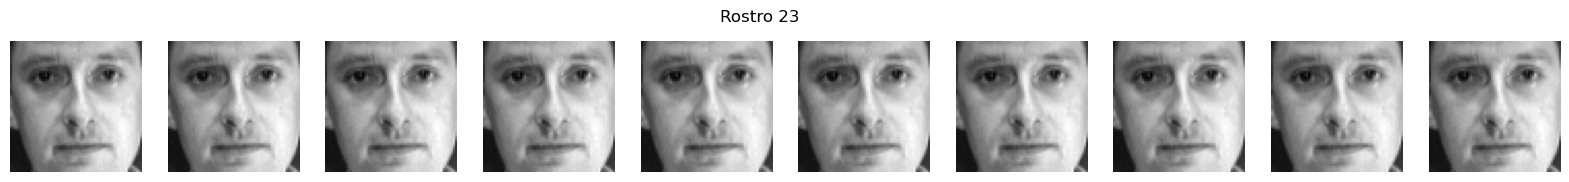

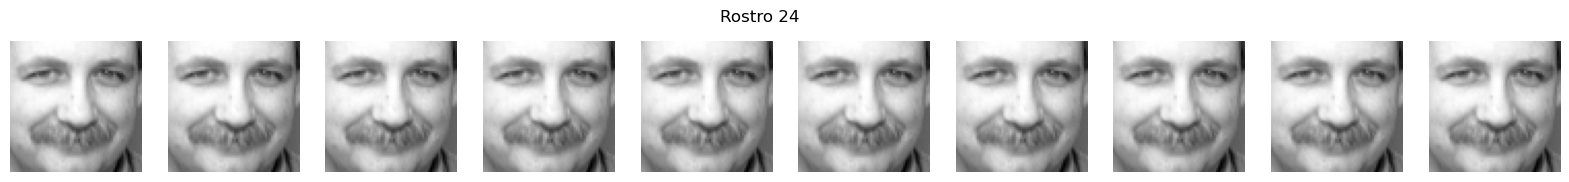

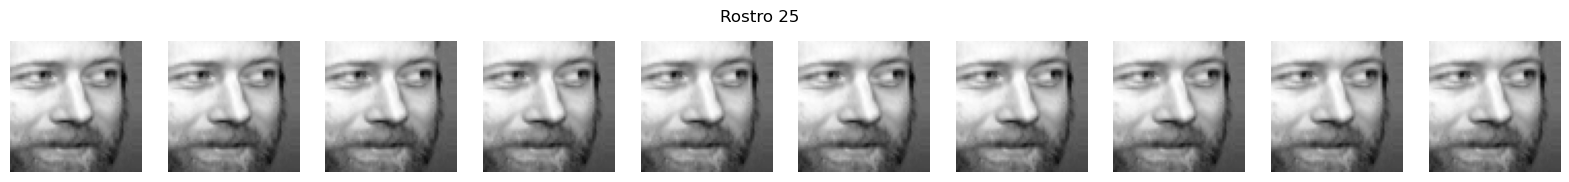

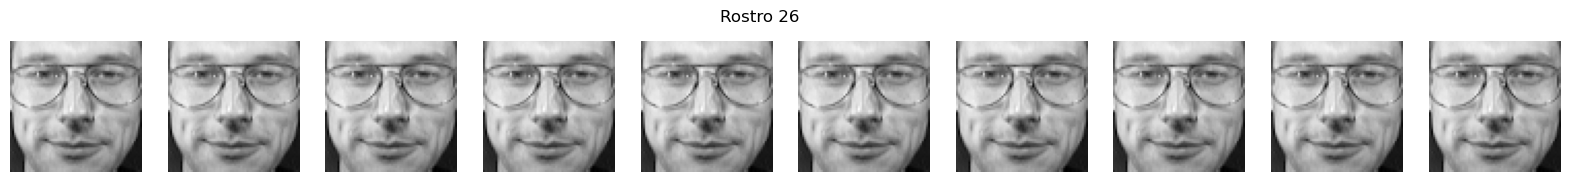

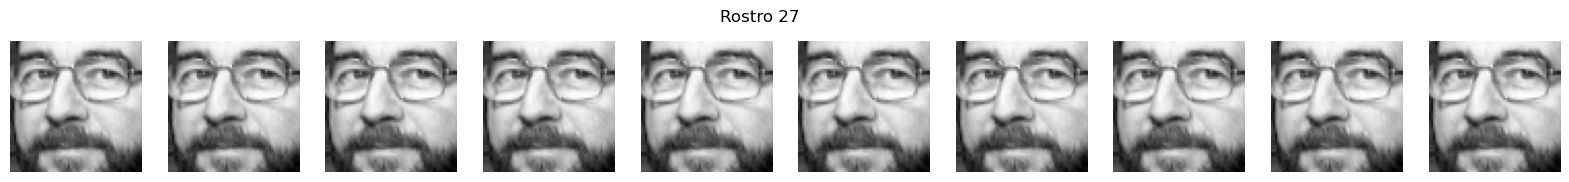

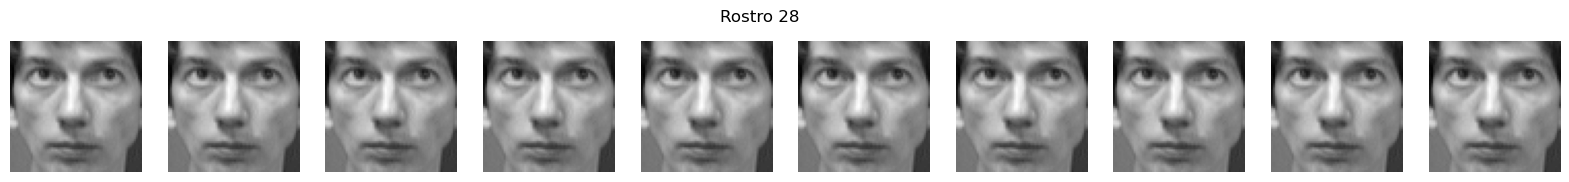

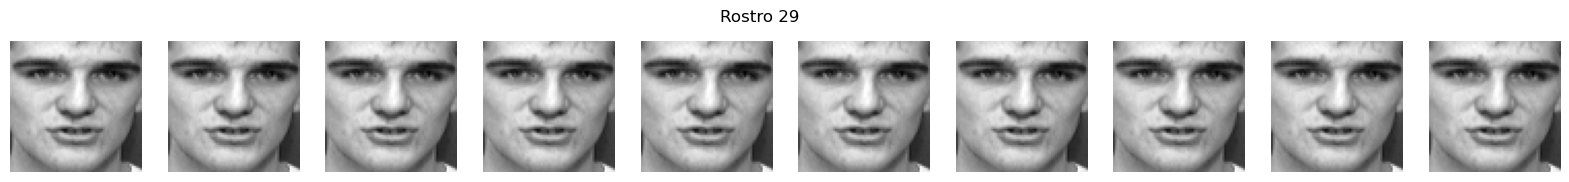

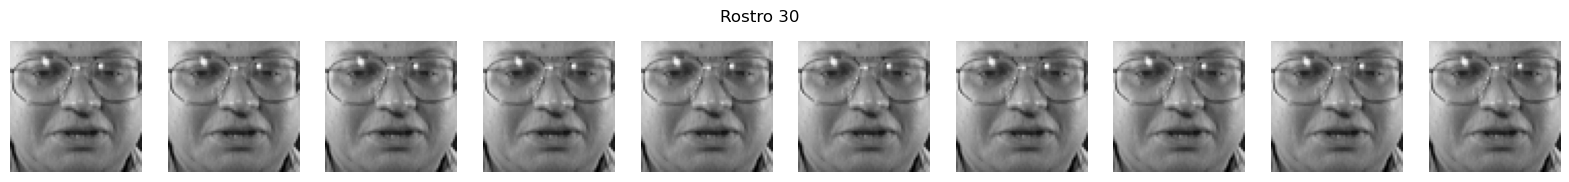

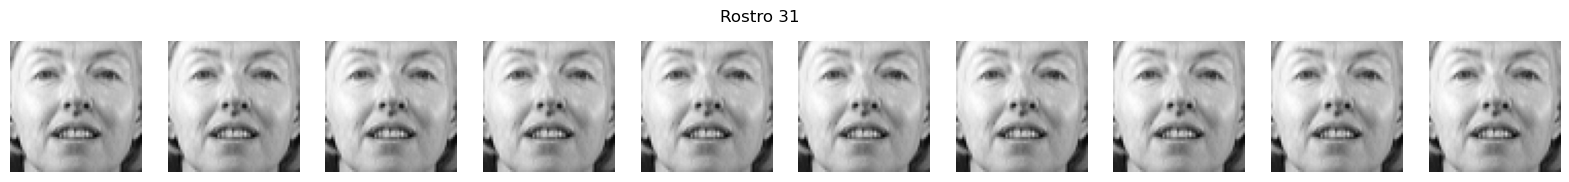

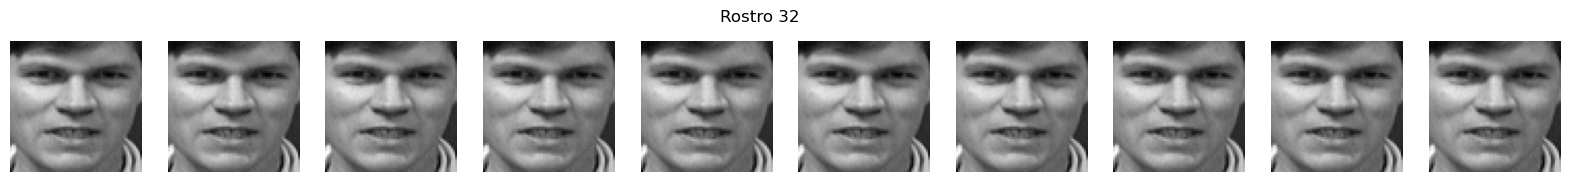

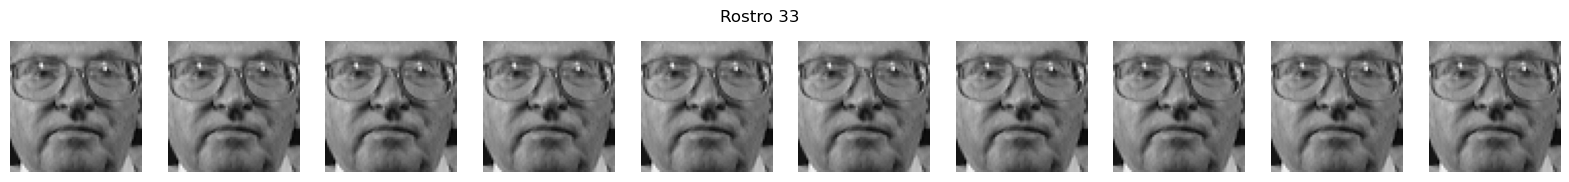

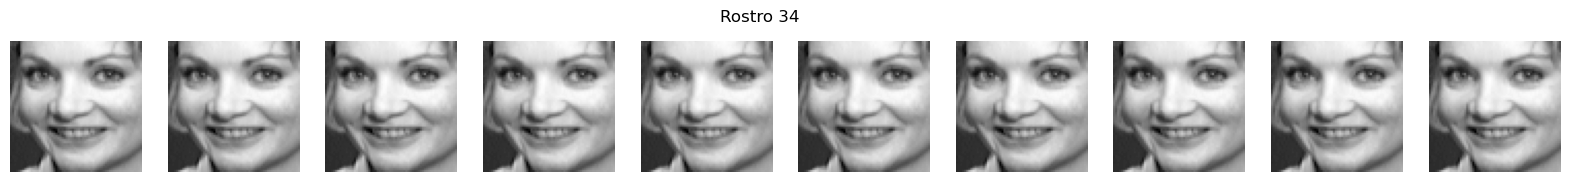

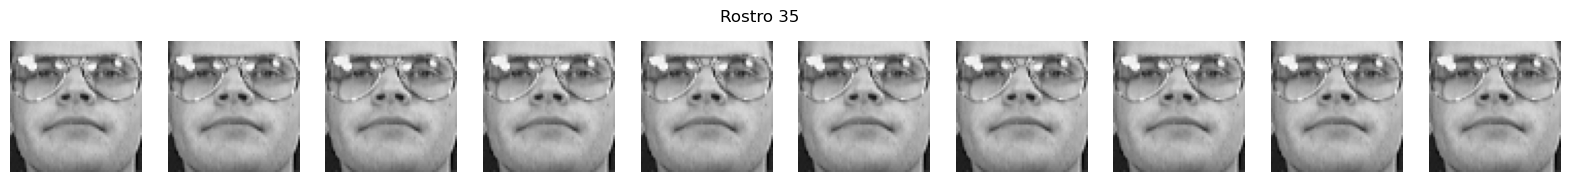

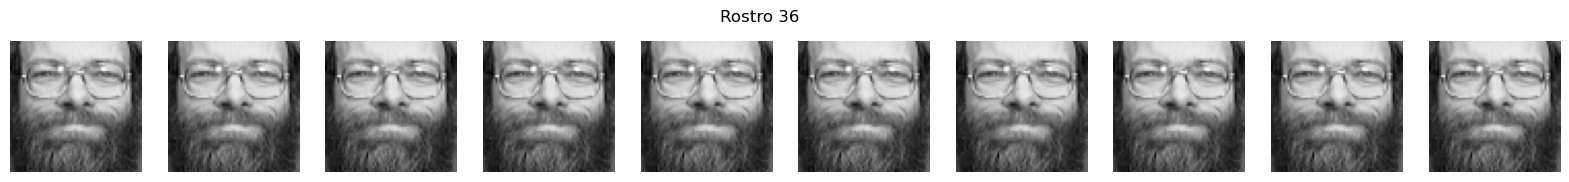

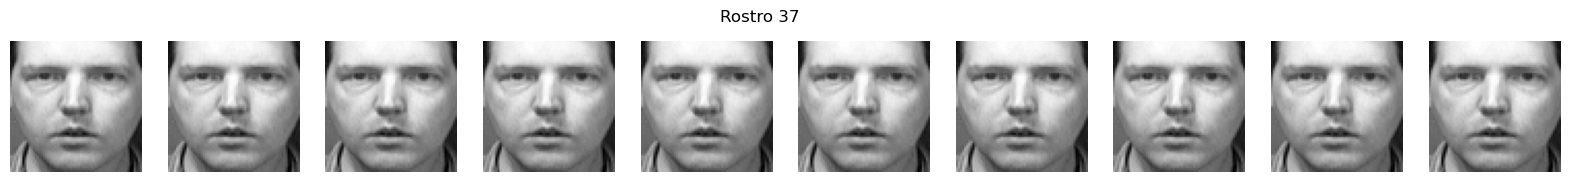

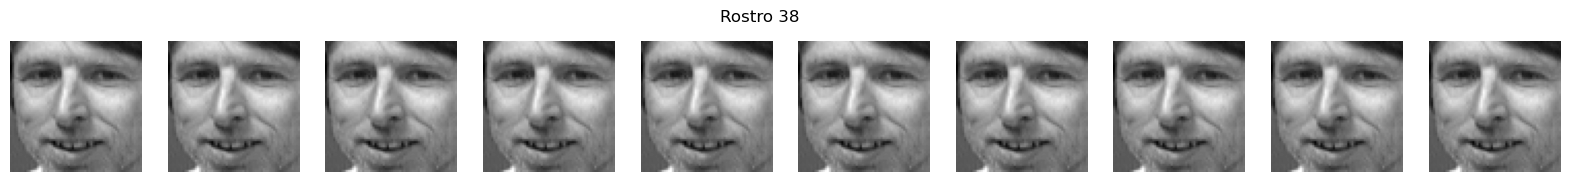

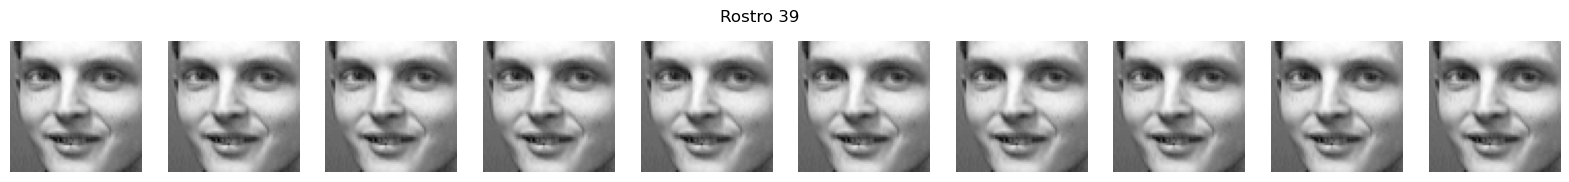

In [104]:
# Veamos los rostos de cada persona

for i in range(400):
    if (i % 10 == 0) | (i == 0):
        fig, axs = plt.subplots(nrows = 1, ncols = 10, figsize = (20, 2)) 
        plt.suptitle("Rostro " + str(int(i/10)))
        continue
    for c in range(10):
        axs[c].imshow(df.images[i], cmap = plt.cm.gray)
        axs[c].axis("off")

In [141]:
# Escalamos los rostros
mu = X.mean(axis = 0)
sigma = X.std(axis = 0)

X_centered = ((X - mu)/sigma)

Como pudo notar en el punto anterior, las imágenes son altamente dimensionales. Antes de proceder con clustering reduzca a dos dimensiones las imágenes utilizando componentes principales. Grafique las dos primeras componentes y comente si se observa algún patron de agrupamiento.

In [152]:
pca_faces = PCA()
componentes_principales = pca_faces.fit_transform(X_centered)

In [153]:
componentes_principales.shape

(400, 400)

In [155]:
componentes_principales = pd.DataFrame(componentes_principales)
componentes_principales

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,3.825463,10.989236,-14.497908,-23.806042,-6.256089,4.874674,-17.646349,-17.736034,-0.246221,-9.738535,...,0.120616,0.265019,0.140039,0.047892,-0.138986,-0.069028,-0.012656,0.224869,0.086284,0.000005
1,-40.320644,-6.472275,19.836681,-24.382471,-21.763084,-8.333723,-15.491045,-11.043385,11.310034,4.919754,...,0.073887,0.042537,0.003779,0.149057,0.069940,0.170716,-0.094489,-0.046368,-0.100180,0.000005
2,-1.583605,2.261888,-12.048373,-20.492092,-11.665356,6.483379,-21.575670,-18.363146,3.739553,-9.127261,...,-0.017160,-0.006891,0.139029,0.069308,0.036682,0.016301,0.100132,-0.166144,-0.040082,0.000005
3,81.431465,3.405219,-3.464754,-0.927142,-11.252586,-9.295848,-2.432030,-3.704716,-4.269228,7.252357,...,-0.104327,-0.002087,0.064208,0.098628,0.173861,-0.009463,0.037291,0.003004,-0.205493,0.000005
4,-11.481330,-23.475651,3.133715,-30.847311,-23.432934,-6.435315,-12.131731,-6.258157,7.804923,3.384655,...,0.027917,-0.062428,0.044606,-0.020474,-0.053118,-0.109023,0.034382,0.043079,0.060108,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-4.469553,-18.820902,14.323133,-2.921699,11.399767,15.875030,-9.524767,11.791548,-0.388378,-2.898394,...,0.291734,0.047953,-0.397068,-0.028270,0.115565,-0.104541,0.143479,-0.055489,-0.131288,0.000005
396,45.833347,-3.524323,-7.778972,-14.057602,-3.527806,-7.799601,1.987111,11.950188,-12.412267,5.784314,...,0.410238,-0.074103,-0.278481,-0.349406,-0.188226,0.010160,0.471973,0.232062,-0.135151,0.000005
397,-9.485387,-22.289778,15.954160,-7.767630,9.160904,7.245910,-8.468251,20.409840,2.521720,4.377611,...,-0.057585,-0.100339,-0.153477,-0.394364,0.045173,-0.296001,0.133817,0.212952,-0.020778,0.000005
398,61.724663,2.595335,-7.417477,-10.518732,-14.371025,-0.133563,1.494778,13.091562,-9.301411,10.112677,...,-0.316802,0.056793,0.310157,0.336856,-0.013563,0.222692,-0.249547,-0.136595,0.094442,0.000005


In [156]:
componentes_principales["Target"] = y

Text(0, 0.5, 'Componente Principal 2')

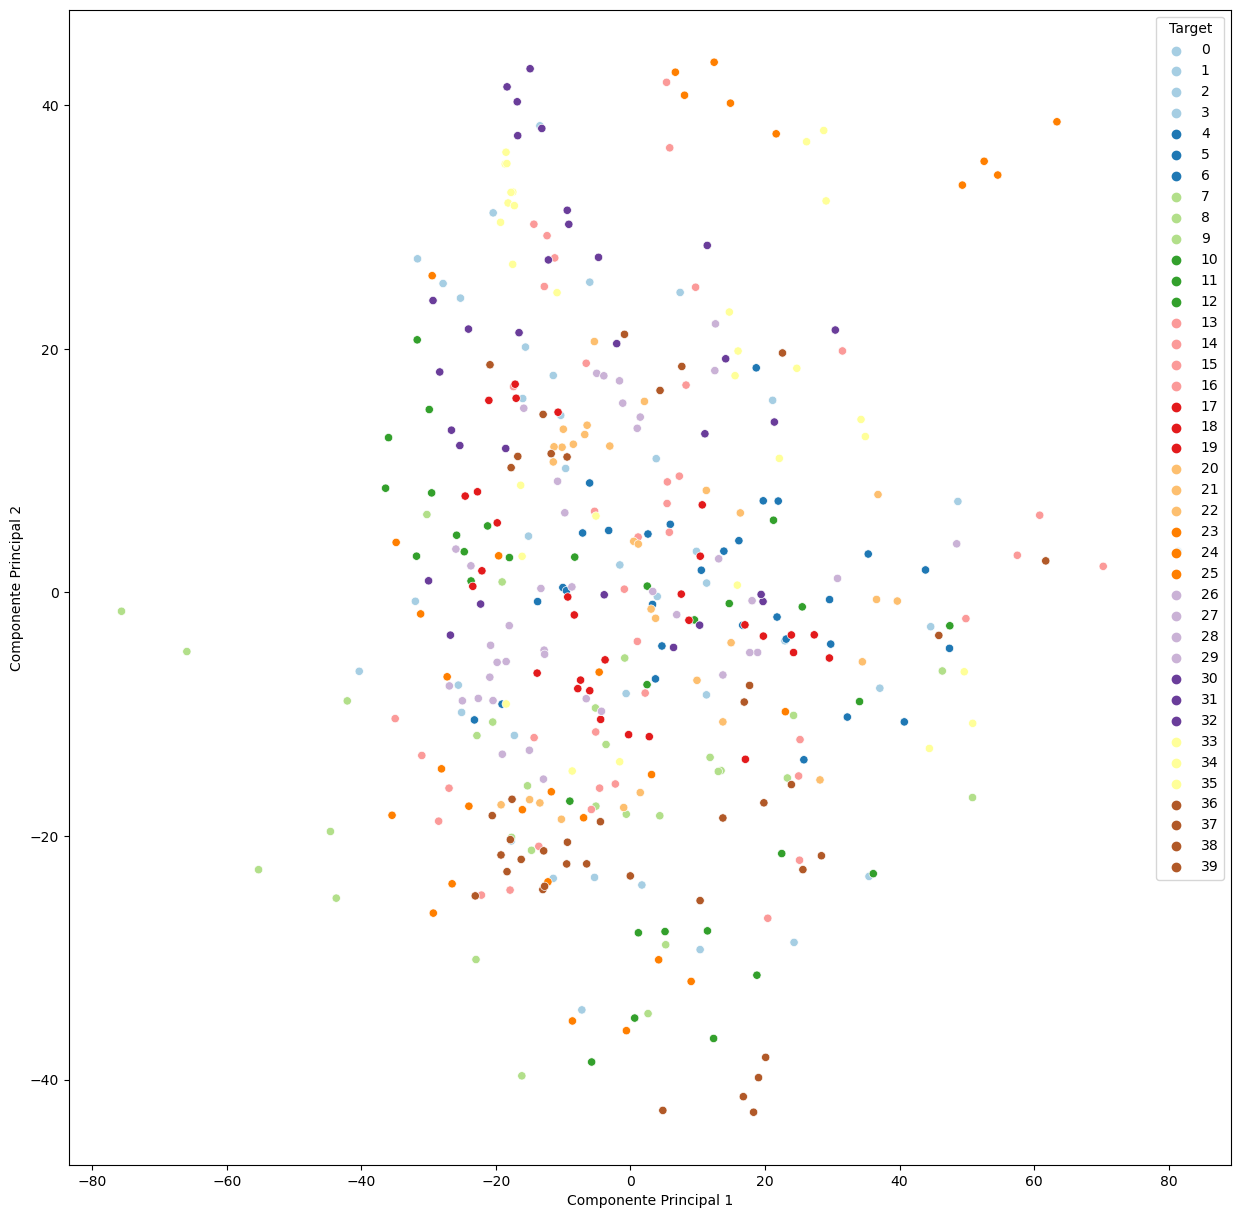

In [162]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(data = componentes_principales, x = 0, y = 1, hue = "Target", legend = "full", 
                palette = sns.color_palette("Paired", as_cmap = True))
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

Escojamos el número óptimo de Componentes Principales

In [165]:
resultados = pd.DataFrame({"Componente": range(1, 401), 
                           "Varianza explicada": pca_faces.explained_variance_})
resultados["Porcentaje de varianza explicada"]  = resultados["Varianza explicada"]/resultados["Varianza explicada"].sum()
resultados["Varianza acumulada"]  = resultados["Varianza explicada"].cumsum()
resultados["Porcentaje acumulado de varianza explicada"]  = resultados["Varianza acumulada"]/resultados["Varianza explicada"].sum()
resultados

,Componente,Varianza explicada,Porcentaje de varianza explicada,Varianza acumulada,Porcentaje acumulado de varianza explicada
0,1,5.171977e+02,1.647560e-01,517.197693,0.164756
1,2,3.409081e+02,1.085981e-01,858.105835,0.273354
2,3,2.055002e+02,6.546314e-02,1063.605957,0.338817
3,4,1.841495e+02,5.866177e-02,1247.755371,0.397479
4,5,1.326049e+02,4.224197e-02,1380.360229,0.439721
...,...,...,...,...,...
395,396,8.971851e-02,2.858029e-05,3138.931396,0.999923
396,397,8.880145e-02,2.828816e-05,3139.020264,0.999951
397,398,8.448089e-02,2.691182e-05,3139.104736,0.999978
398,399,6.602132e-02,2.103143e-05,3139.170654,0.999999


<AxesSubplot:xlabel='Componente', ylabel='Porcentaje acumulado de varianza explicada'>

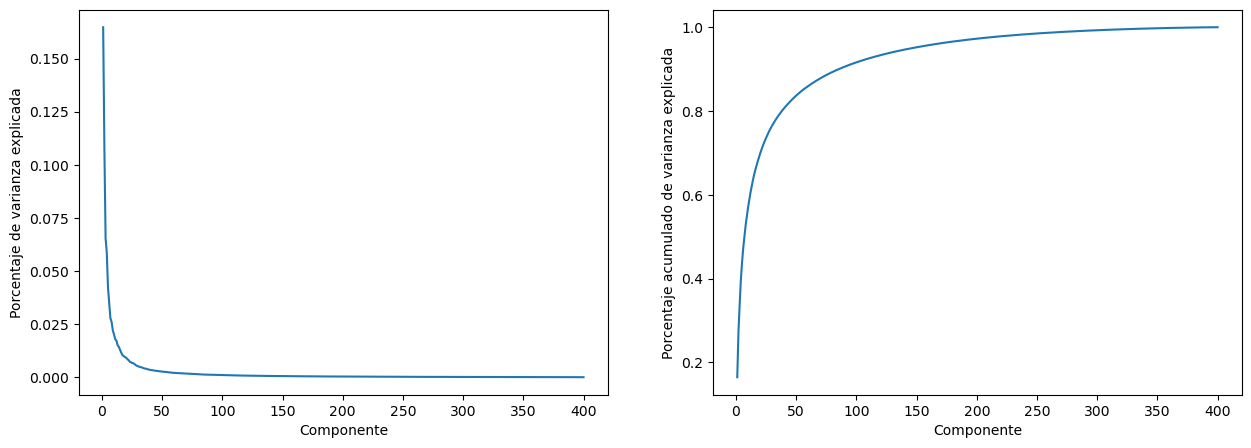

In [166]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
sns.lineplot(data = resultados, x = "Componente", y = "Porcentaje de varianza explicada", ax = ax[0])
sns.lineplot(data = resultados, x = "Componente", y = "Porcentaje acumulado de varianza explicada", ax = ax[1])

In [170]:
resultados[resultados["Porcentaje acumulado de varianza explicada"] > 0.9].head(5)

,Componente,Varianza explicada,Porcentaje de varianza explicada,Varianza acumulada,Porcentaje acumulado de varianza explicada
85,86,3.870995,0.001233,2828.025146,0.900882
86,87,3.760773,0.001198,2831.785889,0.902080
87,88,3.727395,0.001187,2835.513184,0.903267
88,89,3.718171,0.001184,2839.231445,0.904452
89,90,3.651190,0.001163,2842.882568,0.905615


In [172]:
X_pca = componentes_principales.loc[:, 0:86]

In [194]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm 

k_medias = {}
resultados = pd.DataFrame()
for k in tqdm(range(5, 396, 5)):
    modelo = KMeans(n_clusters = k, random_state = 123)
    modelo.fit(X_pca)
    k_medias[k] = modelo
    s = silhouette_score(X = X_pca, labels = modelo.labels_)
    resultado = pd.DataFrame({"k": k, "Varianza interna": modelo.inertia_, "Silhouette": s}, index = [0])
    resultados = pd.concat([resultados, resultado])
resultados = resultados.reset_index(drop = True)

100%|██████████| 79/79 [01:12<00:00,  1.09it/s]


In [203]:
punto_optimo_corte = resultados.loc[resultados["Silhouette"] == resultados["Silhouette"].max(), "k"].values[0]
punto_optimo_corte

140

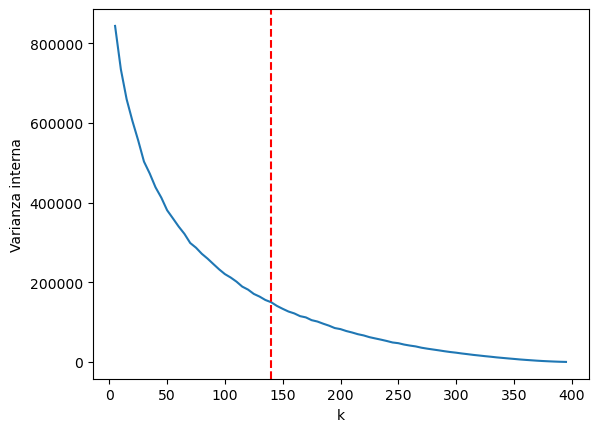

In [205]:
sns.lineplot(data = resultados, x = "k", y = "Varianza interna")
plt.axvline(x = punto_optimo_corte, color = "red", linestyle = "--")

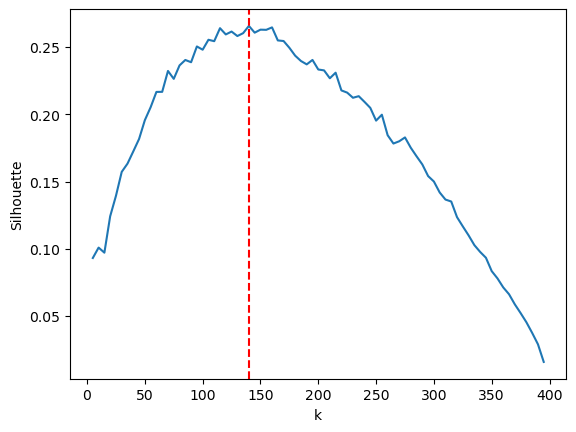

In [206]:
sns.lineplot(data = resultados, x = "k", y = "Silhouette")
plt.axvline(x = punto_optimo_corte, color = "red", linestyle = "--")

In [209]:
y_hat = k_medias[140].labels_

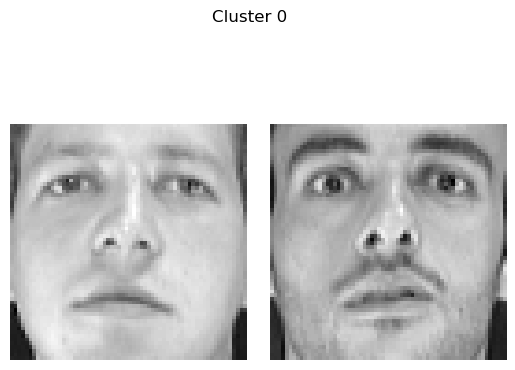

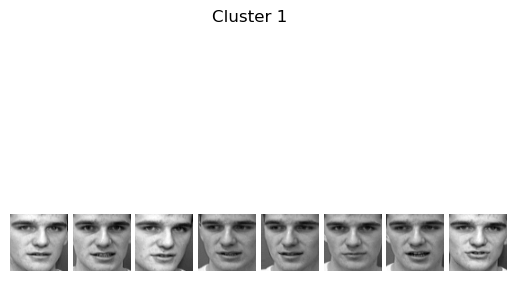

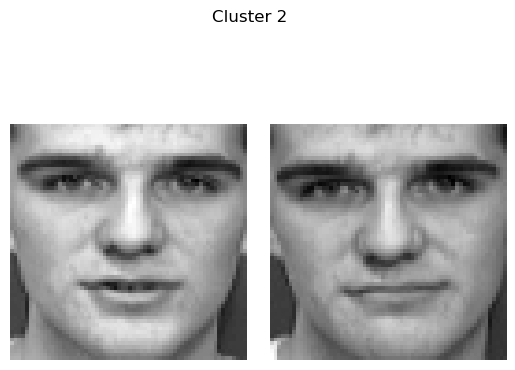

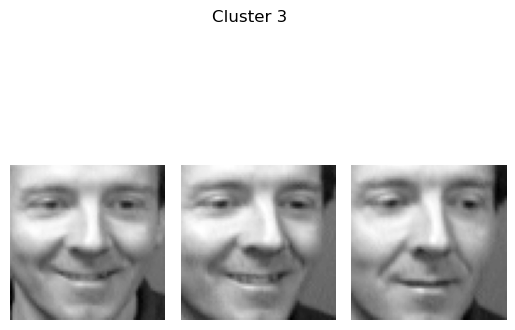

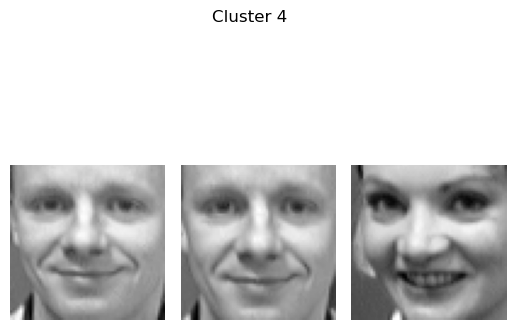

In [286]:
for cluster in range(0, 5):
    idx = np.where(y_hat == cluster)[0]
    if len(idx) > 1:
        rostros = df["images"][idx,:,:]
        n = rostros.shape[0]
        fig, axs = plt.subplots(nrows = 1, ncols = n)
        plt.suptitle("Cluster " + str(cluster))
        for c in range(n):
            axs[c].imshow(rostros[c], cmap = plt.cm.gray)
            axs[c].axis("off")
        plt.subplots_adjust(wspace = 0.1, hspace = 0) 

### Tarea
Utilicen la base de los rostros y entrenen un modelo de Random Forest para tratar de predecir de quién es cada rostro.